## Libraries

### Libraries are awesome


The strength of a language lies as much in the set of libraries available, as it does
in the language itself.

A great set of libraries allows for a very powerful programming style:

* Write minimal code yourself
* Choose the right libraries
* Plug them together
* Create impressive results

Not only is this efficient with your programming time, it's also more efficient with computer
time.

The chances are any algorithm you might want to use has already been programmed better by someone else.

This lecture is available as an [IPython Notebook](http://nbviewer.ipython.org/url/development.rc.ucl.ac.uk/training/engineering/session04/../python/session04.ipynb)



## Careful use of Libraries

### Drawbacks of libraries.


* Sometimes, libraries are not looked after by their creator: code that is not maintained *rots*:
    * It no longer works with later versions of *upstream* libraries.
    * It doesn't work on newer platforms or systems.
    * Features that are needed now, because the field has moved on, are not added

* Sometimes, libraries are hard to get working:
    * For libraries in pure python, this is almost never a problem
    * But many libraries involve *compiled components*: these can be hard to install.


### Contribute, don't duplicate


* You have a duty to the ecosystem of scholarly software:
    * If there's a tool or algorithm you need, find a project which provides it.
    * If there are features missing, or problems with it, fix them, [don't create your own](http://xkcd.com/927/) library.


### How to choose a library


* When was the last commit?
* How often are there commits?
* Can you find the lead contributor on the internet?
* Do they respond when approached:
    * emails to developer list
    * personal emails
    * tweets
    * [irc](https://freenode.net)
    * issues raised on GitHub?
* Are there contributors other than the lead contributor?
* Is there discussion of the library on Stack Exchange?
* Is the code on an open version control tool like GitHub?
* Is it on standard package repositories. (PyPI, apt/yum/brew)
* Are there any tests?
* Download it. Can you build it? Do the tests pass?
* Is there an open test dashboard? (Travis/Jenkins/CDash)
* What dependencies does the library itself have? Do they pass this list?
* Are different versions of the library clearly labeled with version numbers?
* Is there a changelog?


### Sensible Version Numbering


The best approach to version numbers clearly distinguishes kinds of change:

Given a version number MAJOR.MINOR.PATCH, e.g. 2.11.14 increment the:

* MAJOR version when you make incompatible API changes,
* MINOR version when you add functionality in a backwards-compatible manner, and
* PATCH version when you make backwards-compatible bug fixes.

This is called [Semantic Versioning](http://semver.org)


## Python Libraries

### The Python Standard Library


Python comes with a powerful [standard library](https://docs.python.org/2/library/).

Learning python is as much about learning this library as learning the language itself.

You've already seen a few packages in this library: `math`, `pdb`, `pytest`, `datetime`.


### The Python Package Index


Python's real power, however, comes with the Python Package Index: [PyPI](https://pypi.python.org/pypi).
This is a huge array of libraries, with all kinds of capabilities, all easily installable from the 
command line or through your Python distribution.


### Pip


Packages from PyPI are installed using Pip.


```
pip list # See what you have installed
pip search geopy # Search PyPI for a package
sudo pip install <package> # install a package
sudo pip install <package> --upgrade # upgrade
sudo pip uninstall <package>
```

## Some libraries

### Argparse


This is the standard library for building programs with a command-line interface.







In [1]:
%%writefile greeter.py
#!/usr/bin/env python
from argparse import ArgumentParser
if __name__ == "__main__":
    parser = ArgumentParser(description = "Generate appropriate greetings")
    parser.add_argument('--title', '-t')
    parser.add_argument('--polite','-p', action="store_true")
    parser.add_argument('personal')
    parser.add_argument('family')
    arguments= parser.parse_args()
    greeting= "How do you do, " if arguments.polite else "Hey, "
    if arguments.title:
        greeting+=arguments.title+" "
    greeting+= arguments.personal + " " + arguments.family +"."
    print greeting


Overwriting greeter.py


In [2]:
%%bash
#!/usr/bin/env bash
chmod u+x greeter.py
./greeter.py --help
./greeter.py James Hetherington
./greeter.py --polite James Hetherington
./greeter.py James Hetherington --title Dr


usage: greeter.py [-h] [--title TITLE] [--polite] personal family

Generate appropriate greetings

positional arguments:
  personal
  family

optional arguments:
  -h, --help            show this help message and exit
  --title TITLE, -t TITLE
  --polite, -p
Hey, James Hetherington.
How do you do, James Hetherington.
Hey, Dr James Hetherington.


### Operating system paths and files


When loading and saving files, standard libraries allow you to manage file names,
in an operating-system independent way:



In [3]:
__file__ = "session04.ipynb" # No __file__ in notebook!

In [4]:
from os.path import join, dirname, abspath
# Load the data file from session 1
datapath=join(dirname(dirname(abspath(__file__))),
              'session01', 'data', 'inflammation-01.csv')
newpath=join(dirname(__file__), 'midvals.yaml')




And you'll want to be able to read and write to files:




In [5]:
source = open(datapath)
import csv
reader = csv.reader(source)
midvals = [row[len(row)/2] for row in reader]
print midvals
source.close()

['6', '18', '19', '17', '9', '12', '9', '20', '6', '18', '8', '9', '13', '15', '12', '9', '13', '13', '7', '9', '18', '12', '16', '14', '17', '7', '9', '15', '20', '14', '13', '19', '11', '10', '14', '15', '16', '15', '19', '15', '18', '19', '12', '18', '6', '14', '19', '10', '12', '16', '5', '20', '11', '15', '16', '16', '14', '9', '8', '6']





Note the use of the `csv` library to read csv files as well.


### Context managers


There's a better way to handle opening and closing files




In [6]:
import yaml
with open(newpath, 'w') as yamlfile:
    yaml.dump(midvals, yamlfile)




This syntax using `with` is called a context manager.
It is used when a library wants stuff to happen both before **and** after client code is called.

Here, [`yaml`](http://www.yaml.org) is another standard file format for data files similar to XML or CSV.


### Working with web resources


To interact with resources on the web, you need a way to work with URLs: escaping characters that
can't appear in URLs, composing ?foo=bar web argument strings and so on.

We can use the [requests](http://docs.python-requests.org/en/latest/) library from PyPI for this.




In [7]:

import requests
ucl=requests.get(
    'http://en.wikipedia.org/wiki/University_College_London'
)
map_here=requests.get('http://maps.googleapis.com/maps/api/staticmap',
        params={'center':"51.5, -0.1", 'size':"400x400", 'zoom':10})
print ucl.url
print map_here.url


https://en.wikipedia.org/wiki/University_College_London
http://maps.googleapis.com/maps/api/staticmap?size=400x400&zoom=10&center=51.5%2C+-0.1





And you can download files from the web, accessing headers and the body of the response:




In [8]:

print "Beginning of HTML file", ucl.text.split()[0:2]
with open('map.png','w') as map_image:
    map_image.write(map_here.content)


Beginning of HTML file [u'<!DOCTYPE', u'html>']





Libraries even allow you to parse HTML content, to find the data you want within a page:




In [9]:
# pip install beautifulsoup4
from bs4 import BeautifulSoup
import re # Python regular expression library
wikipage=BeautifulSoup(ucl.text)
# HTML looks like <span class="latitude">value</span>
motto=wikipage.find(text=re.compile("Motto"))

#print 'Coordinates:', latitude, longitude

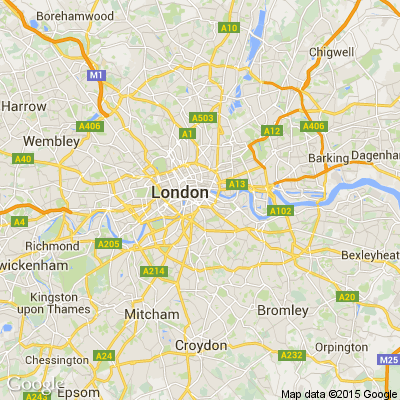

In [10]:
import IPython
IPython.core.display.Image(map_here.content)